In [46]:
#Find those who survived given that they were female and their passenger class was 3 using naive bayes algorithm:
#Bayes theorem:P(survived)|pclass=3,gender=female)=P(pclass=3,gender=female|survived)*p(survived)/P(pclass=3,gender=female)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/tested.csv')
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [49]:
#One-hot encode the 'gender' column
df=pd.get_dummies(df,columns=['Sex'])
#now,the gender column will be replaced with two new columns:
#'gender_male'and 'gender_female'
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare Cabin Embarked  Sex_female  Sex_male  
0   7.8292   NaN        Q       False      True  
1   7.0000   NaN        S        True     False  
2   9.6875   NaN        Q       False      True  
3   8.6625   NaN        S       False      True  
4  12.2875   NaN        S        True     False

In [51]:
X=df[['Pclass','Sex_female']]
y=df['Survived']

In [52]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [53]:
nb=GaussianNB()
#Train the classifier
nb.fit(X_train,y_train)

GaussianNB()

In [54]:
#Make the predictions
y_pred=nb.predict(X_test)

In [55]:
#Create the dtaframe to show predictions and actual values
results=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

In [56]:
#Print the results dataframe
print(results)

     Actual  Prediction
321       0           0
324       1           1
388       0           0
56        0           0
153       1           1
..      ...         ...
57        0           0
126       0           0
24        1           1
17        0           0
66        1           1

[84 rows x 2 columns]


In [28]:
#Caluclate accuracy score(optional)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

Accuracy:1.0000


In [57]:
#Predict the probability of survival for a female passenger in calss 3
new_passenger=[[3,1]] # 1= gender == female is true
predicted_probability=nb.predict_proba(new_passenger)[0][1]  
#Sample output:0.3,0.7
#It might return 0.3 (p(did not survive),0.7 (p(survived)) in the 0th row

C:\ProgramData\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [58]:
print("Probability of survival for a passenger in class 3:",predicted_probability)

Probability of survival for a passenger in class 3: 1.0


In [59]:
#Evaluate the model with confusion matrix and classification report
conf_matrix=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[50  0]
 [ 0 34]]


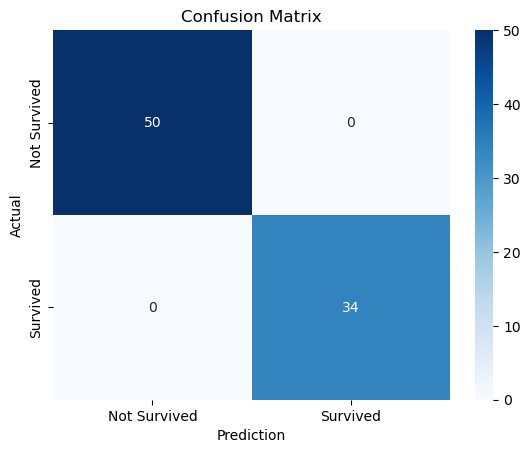

In [60]:
#Visualize the confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [44]:
#Print the classification report
class_report=classification_report(y_test,y_pred,target_names=['Not Survived','Survived'])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        50
    Survived       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

